<a href="https://colab.research.google.com/github/ArelyA/CE888_2020_Data-Science/blob/master/DS_Lab7_E4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Brain MRI Images for Brain Tumor Detection**

### **Get Data**
The dataset consists of 2 folders containing MRI brain images
* yes - contains images of brains with tumors
* no - contains images of brains without tumors

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "arelya" # username from the json file
os.environ['KAGGLE_KEY'] = "e276ea403eb01cd7fef5f90fdbcf34db" # key from the json file
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection # api copied from kaggle

 33% 5.00M/15.1M [00:00<00:00, 30.8MB/s]
100% 15.1M/15.1M [00:00<00:00, 60.0MB/s]


In [2]:
from zipfile import ZipFile
file_name = "/content/brain-mri-images-for-brain-tumor-detection.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [3]:
data_dir_list = os.listdir('/content')
print(data_dir_list)
print(os.listdir('/content/no'))

['.config', 'brain-mri-images-for-brain-tumor-detection.zip', 'yes', 'no', 'brain_tumor_dataset', 'sample_data']
['15 no.jpg', 'no 923.jpg', 'N2.JPG', '38 no.jpg', 'no 99.jpg', 'No19.jpg', 'N5.jpg', 'no 100.jpg', '4 no.jpg', 'N22.JPG', 'No21.jpg', '18 no.jpg', 'No13.jpg', '3 no.jpg', '14 no.jpg', 'no 9.png', 'no 4.jpg', '30 no.jpg', 'no 97.jpg', '12 no.jpg', '40 no.jpg', '9 no.jpg', '45 no.jpg', '47 no.jpg', '49 no.jpg', '11 no.jpg', 'No20.jpg', 'No12.jpg', 'no 90.jpg', '43 no.jpg', '35 no.jpg', '21 no.jpg', '20 no.jpg', '27 no.jpg', 'no 98.jpg', '41 no.jpg', 'N26.JPG', '32 no.jpg', '39 no.jpg', '46 no.jpg', 'no 10.jpg', 'No11.jpg', '36 no.jpg', '8 no.jpg', 'no 8.jpg', 'no 89.jpg', 'N3.jpg', 'no.jpg', 'N15.jpg', '24 no.jpg', 'no 7.jpeg', 'no 96.jpg', '37 no.jpg', '1 no.jpeg', '23 no.jpg', '19 no.jpg', 'No14.jpg', '5 no.jpg', 'no 2.jpg', '25 no.jpg', 'no 91.jpeg', 'No18.jpg', 'N21.jpg', 'no 94.jpg', 'No16.jpg', '22 no.jpg', 'N20.JPG', 'N11.jpg', '17 no.jpg', 'No17.jpg', '34 no.jpg', '31

### **Upload data**

### Yes

In [0]:
original_dataset_dir = '/content'
base_dir = '/content/yes_and_no'
os.mkdir(base_dir)

In [0]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_yes_dir = os.path.join(train_dir, 'yes')
os.mkdir(train_yes_dir)

train_no_dir = os.path.join(train_dir, 'no')
os.mkdir(train_no_dir)

validation_yes_dir = os.path.join(validation_dir, 'yes')
os.mkdir(validation_yes_dir)

validation_no_dir = os.path.join(validation_dir, 'no')
os.mkdir(validation_no_dir)

test_yes_dir = os.path.join(test_dir, 'yes')
os.mkdir(test_yes_dir)

test_no_dir = os.path.join(test_dir, 'no')
os.mkdir(test_no_dir)

In [6]:
print(os.listdir('/content/yes_and_no'))

['validation', 'test', 'train']


In [7]:
print(os.listdir('/content/no'))
print(os.listdir('/content/yes'))

['15 no.jpg', 'no 923.jpg', 'N2.JPG', '38 no.jpg', 'no 99.jpg', 'No19.jpg', 'N5.jpg', 'no 100.jpg', '4 no.jpg', 'N22.JPG', 'No21.jpg', '18 no.jpg', 'No13.jpg', '3 no.jpg', '14 no.jpg', 'no 9.png', 'no 4.jpg', '30 no.jpg', 'no 97.jpg', '12 no.jpg', '40 no.jpg', '9 no.jpg', '45 no.jpg', '47 no.jpg', '49 no.jpg', '11 no.jpg', 'No20.jpg', 'No12.jpg', 'no 90.jpg', '43 no.jpg', '35 no.jpg', '21 no.jpg', '20 no.jpg', '27 no.jpg', 'no 98.jpg', '41 no.jpg', 'N26.JPG', '32 no.jpg', '39 no.jpg', '46 no.jpg', 'no 10.jpg', 'No11.jpg', '36 no.jpg', '8 no.jpg', 'no 8.jpg', 'no 89.jpg', 'N3.jpg', 'no.jpg', 'N15.jpg', '24 no.jpg', 'no 7.jpeg', 'no 96.jpg', '37 no.jpg', '1 no.jpeg', '23 no.jpg', '19 no.jpg', 'No14.jpg', '5 no.jpg', 'no 2.jpg', '25 no.jpg', 'no 91.jpeg', 'No18.jpg', 'N21.jpg', 'no 94.jpg', 'No16.jpg', '22 no.jpg', 'N20.JPG', 'N11.jpg', '17 no.jpg', 'No17.jpg', '34 no.jpg', '31 no.jpg', '26 no.jpg', 'N1.JPG', 'No22.jpg', '6 no.jpg', 'no 92.jpg', 'no 5.jpeg', '44no.jpg', 'no 6.jpg', '10 no

In [8]:
import math
path, dirs, files_y = next(os.walk("/content/yes"))
file_count = len(files_y)
print(files_y)
print(file_count)
tr_y = math.ceil(file_count/2)
va_y = math.ceil(tr_y + tr_y/2)
te_y = file_count
print(tr_y, va_y, te_y)
path, dirs, files_n = next(os.walk("/content/no"))
file_count = len(files_n)
print(file_count)
tr_n = math.ceil(file_count/2)
va_n = math.ceil(tr_n + tr_n/2)
te_n = file_count
print(tr_n, va_n, te_n)

['Y74.jpg', 'Y92.png', 'Y246.JPG', 'Y107.jpg', 'Y247.JPG', 'Y97.JPG', 'Y146.JPG', 'Y69.jpg', 'Y95.jpg', 'Y56.jpg', 'Y58.JPG', 'Y9.jpg', 'Y53.jpg', 'Y11.jpg', 'Y20.jpg', 'Y120.JPG', 'Y162.jpg', 'Y41.jpg', 'Y13.jpg', 'Y165.JPG', 'Y111.JPG', 'Y188.jpg', 'Y192.JPG', 'Y251.JPG', 'Y112.JPG', 'Y183.jpg', 'Y1.jpg', 'Y244.JPG', 'Y105.jpg', 'Y59.JPG', 'Y28.jpg', 'Y32.jpg', 'Y78.jpg', 'Y170.JPG', 'Y104.jpg', 'Y75.JPG', 'Y39.jpg', 'Y154.jpg', 'Y52.jpg', 'Y163.JPG', 'Y180.jpg', 'Y36.JPG', 'Y24.jpg', 'Y50.JPG', 'Y181.jpg', 'Y182.JPG', 'Y8.jpg', 'Y255.JPG', 'Y158.JPG', 'Y157.JPG', 'Y98.JPG', 'Y12.jpg', 'Y82.jpg', 'Y6.jpg', 'Y62.jpg', 'Y250.jpg', 'Y92.jpg', 'Y19.JPG', 'Y85.JPG', 'Y81.jpg', 'Y47.JPG', 'Y70.jpg', 'Y114.JPG', 'Y254.jpg', 'Y161.JPG', 'Y116.JPG', 'Y102.jpg', 'Y76.jpg', 'Y115.JPG', 'Y55.jpg', 'Y30.jpg', 'Y155.JPG', 'Y187.jpg', 'Y67.JPG', 'Y117.JPG', 'Y79.jpg', 'Y257.jpg', 'Y27.jpg', 'Y184.JPG', 'Y7.jpg', 'Y34.jpg', 'Y2.jpg', 'Y54.jpg', 'Y99.JPG', 'Y164.JPG', 'Y60.jpg', 'Y169.jpg', 'Y25.jpg'

In [0]:
import shutil

original_dataset_dir = '/content/yes'
i = 0
for fname in files_y:
  #print(fname)
  i += 1
  if(i <= tr_y):
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_yes_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
  elif(i <= va_y):
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_yes_dir, fname)
    shutil.copyfile(src, dst)
  else:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_yes_dir, fname)
    shutil.copyfile(src, dst)
    
i = 0
original_dataset_dir = '/content/no'
for fname in files_n:
  i += 1
  if(i <= tr_n):
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_no_dir, fname)
    shutil.copyfile(src, dst)
  elif(i <= va_n):
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_no_dir, fname)
    shutil.copyfile(src, dst)
  else:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_no_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
print('total training yes images:', len(os.listdir(train_yes_dir)))
print('total training no images:', len(os.listdir(train_no_dir)))
print('total validation yes images:', len(os.listdir(validation_yes_dir)))

print('total validation no images:', len(os.listdir(validation_no_dir)))
print('total test yes images:', len(os.listdir(test_yes_dir)))
print('total test no images:', len(os.listdir(test_no_dir)))

total training yes images: 78
total training no images: 49
total validation yes images: 39
total validation no images: 25
total test yes images: 38
total test no images: 24


In [23]:
import tensorflow as tf

model = tf.keras.models.Sequential() 
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model.add(tf.keras.layers.MaxPooling2D((2, 2))) 
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D((2, 2))) 
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D((2, 2))) 
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D((2, 2))) 
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(512, activation='relu')) 
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [0]:
model.compile(loss='binary_crossentropy', 
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [26]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 127 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


In [27]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 84s 842ms/step - loss: 0.4272 - acc: 0.8031 - val_loss: 0.5694 - val_acc: 0.7381
Epoch 2/30
100/100 [==============================] - 84s 839ms/step - loss: 0.2358 - acc: 0.9054 - val_loss: 0.6078 - val_acc: 0.7632
Epoch 3/30
100/100 [==============================] - 83s 835ms/step - loss: 0.0757 - acc: 0.9807 - val_loss: 0.8937 - val_acc: 0.8158
Epoch 4/30
100/100 [==============================] - 84s 837ms/step - loss: 0.0189 - acc: 0.9961 - val_loss: 0.6654 - val_acc: 0.8036
Epoch 5/30
100/100 [==============================] - 84s 836ms/step - loss: 0.0057 - acc: 0.9983 - val_loss: 0.9018 - val_acc: 0.7917
Epoch 6/30
100/100 [==============================] - 84s 836ms/step - loss: 0.0042 - acc: 0.9978 - val_loss: 0.9557 - val_acc: 0.7961
Epoch 7/30
100/100 [==============================] - 84s 837ms/step - loss: 8.5036e-05 - acc: 1.0000 - val_loss: 

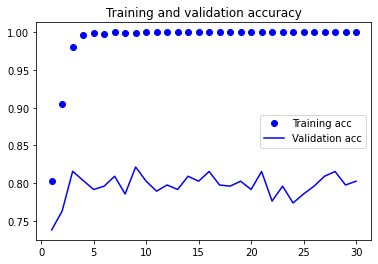

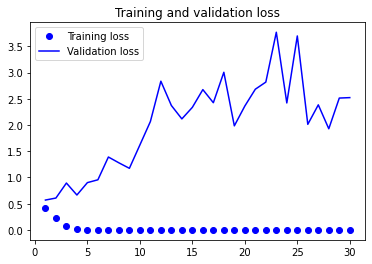

In [28]:
model.save('yes_and_no_1.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='sigmoid',
input_shape=(150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='softmax'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [30]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 127 images belonging to 2 classes.
Found 64 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 184s 2s/step - loss: 0.6700 - acc: 0.6117 - val_loss: 0.6691 - val_acc: 0.6094
Epoch 2/20
100/100 [==============================] - 186s 2s/step - loss: 0.6695 - acc: 0.6142 - val_loss: 0.6684 - val_acc: 0.6094
Epoch 3/20
100/100 [==============================] - 193s 2s/step - loss: 0.6679 - acc: 0.6142 - val_loss: 0.6659 - val_acc: 0.6094
Epoch 4/20
100/100 [==============================] - 189s 2s/step - loss: 0.6621 - acc: 0.6142 - val_loss: 0.6537 - val_acc: 0.6106
Epoch 5/20
100/100 [==============================] - 188s 2s/step - loss: 0.6380 - acc: 0.6280 - val_loss: 0.6445 - val_acc: 0.6094
Epoch 6/20
100/100 [==============================] - 187s 2s/step - loss: 0.6073 - acc: 0.6687 - val_loss: 0.6277 - val_acc: 0.7025
Epoch 7/20
100/100 [==============================] - 186s 2s/step - loss: 0.5953 - acc: 0.6923 - val_loss: 0.7279 - val_

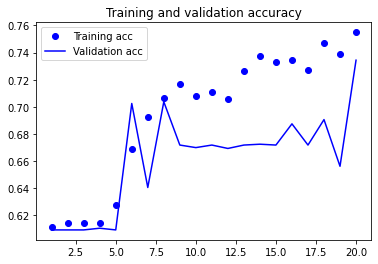

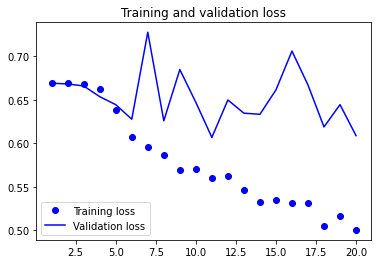

In [31]:
model.save('yes_and_no_1.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()